In [1]:
#Import packages

import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
from Dense import Dense
from Activations import Tanh
from Losses import mse, mse_prime
from Network import train, predict
from Visualize import visualize_network


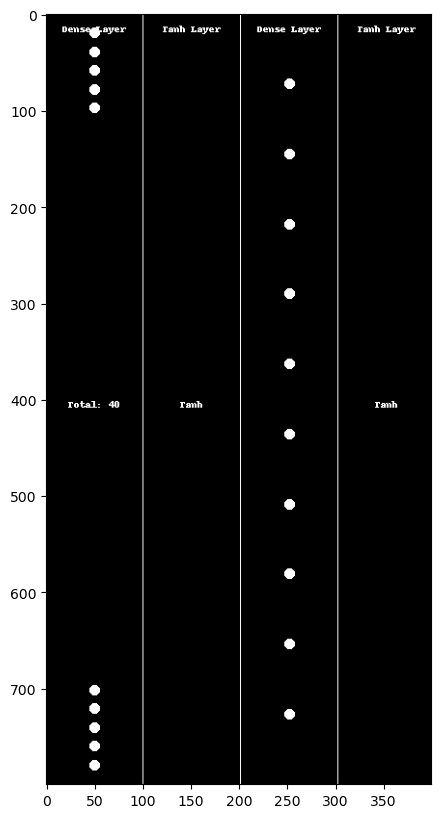

In [15]:
def preprocess_data(x, y, limit):
    # reshape and normalize input data
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype("float32") / 255
    # encode output which is a number in range [0,9] into a vector of size 10
    # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    y = np_utils.to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[:limit], y[:limit]


# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 6000)
x_test, y_test = preprocess_data(x_test, y_test, 1000)

# neural network
network = [
    Dense(28 * 28, 40, regularization=0.01),
    Tanh(),
    Dense(40, 10, regularization=0.01),
    Tanh()
]
network_image = visualize_network(network)

#Show the network big picture
plt.figure(figsize=(10,10))
plt.imshow(network_image) #Q. how to make the picture bigger? A. use plt.figure(figsize=(20,20))



In [16]:

# train
costs = train(network, mse, mse_prime, x_train, y_train, epochs=20, batch_size = 6, learning_rate=0.01)


1/20, error=0.9375156240895259
2/20, error=0.855052261758341
3/20, error=0.7597777565297741
4/20, error=0.6476841822418262
5/20, error=0.5087734794043748
6/20, error=0.33079008646183383
7/20, error=0.17635086890270074
8/20, error=0.10345698766402957
9/20, error=0.07843006501620252
10/20, error=0.06886094605339464
11/20, error=0.0641534540353283
12/20, error=0.06121209031497572
13/20, error=0.059115158898966694
14/20, error=0.05760080136365416
15/20, error=0.056538020377718434
16/20, error=0.05581505325529635
17/20, error=0.055328823217416716
18/20, error=0.054989135393053876
19/20, error=0.05473341585779746


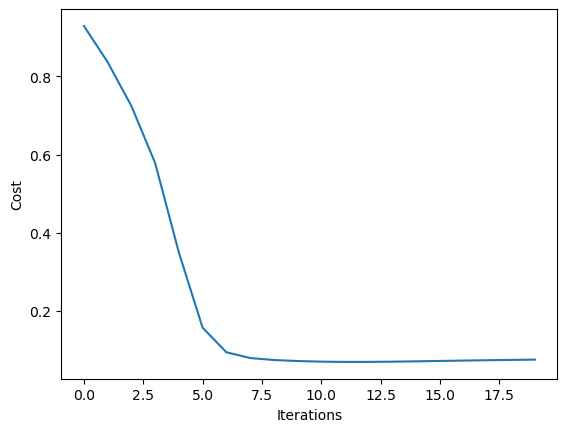

error: 0.07683299371928923
pred: 7 	true: 7
pred: 6 	true: 2
pred: 1 	true: 1
pred: 0 	true: 0
pred: 4 	true: 4
pred: 1 	true: 1
pred: 9 	true: 4
pred: 9 	true: 9
pred: 6 	true: 5
pred: 9 	true: 9
pred: 0 	true: 0
pred: 1 	true: 6
pred: 9 	true: 9
pred: 0 	true: 0
pred: 1 	true: 1
pred: 3 	true: 5
pred: 9 	true: 9
pred: 7 	true: 7
pred: 3 	true: 3
pred: 9 	true: 4
pred: 7 	true: 9
pred: 6 	true: 6
pred: 1 	true: 6
pred: 6 	true: 5
pred: 9 	true: 4
pred: 0 	true: 0
pred: 7 	true: 7
pred: 4 	true: 4
pred: 0 	true: 0
pred: 1 	true: 1
pred: 3 	true: 3
pred: 1 	true: 1
pred: 3 	true: 3
pred: 6 	true: 4
pred: 7 	true: 7
pred: 6 	true: 2
pred: 7 	true: 7
pred: 1 	true: 1
pred: 1 	true: 2
pred: 1 	true: 1
pred: 1 	true: 1
pred: 7 	true: 7
pred: 9 	true: 4
pred: 1 	true: 2
pred: 1 	true: 3
pred: 3 	true: 5
pred: 1 	true: 1
pred: 1 	true: 2
pred: 9 	true: 4
pred: 4 	true: 4
pred: 6 	true: 6
pred: 3 	true: 3
pred: 9 	true: 5
pred: 1 	true: 5
pred: 6 	true: 6
pred: 0 	true: 0
pred: 4 	true: 4
pred

In [14]:

# plot costs
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# calculate error on test set
error = 0
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    error += mse(y, output)
error /= len(x_test)
print("error:", error)


# test
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    print('pred:', np.argmax(output), '\ttrue:', np.argmax(y))
